### Implement Bilinear Interpolation Filter

In [1]:
# libraries for plot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '2'

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Draw a Circle

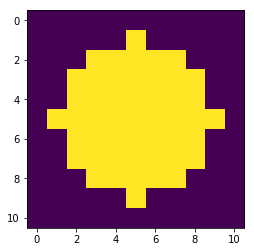

In [2]:
x = np.zeros((11,11))
# draw a circle by filling ones
cx, cy, r = 5, 5, 4
for i in range(cx-r,cx+r+1):
    for j in range(cy-r, cy+r+1):
        if (i-cx)*(i-cx) + (j-cy)*(j-cy) <= r*r:
            x[j,i] = 1

X = tf.convert_to_tensor(x)
# showing rectangle
plt.imshow(X)

### Bilinear Function in Tensorflow

In [3]:
# Reshape X to 4-D tensor 
# X : [1,11,11,1]
X = tf.expand_dims(tf.expand_dims(X,2),0)
X_upsample = tf.image.resize_bilinear(X,[32*11,32*11])
X = tf.squeeze(X)
X_upsample = tf.squeeze(X_upsample)

Text(0.5,1,'After : 352x352')

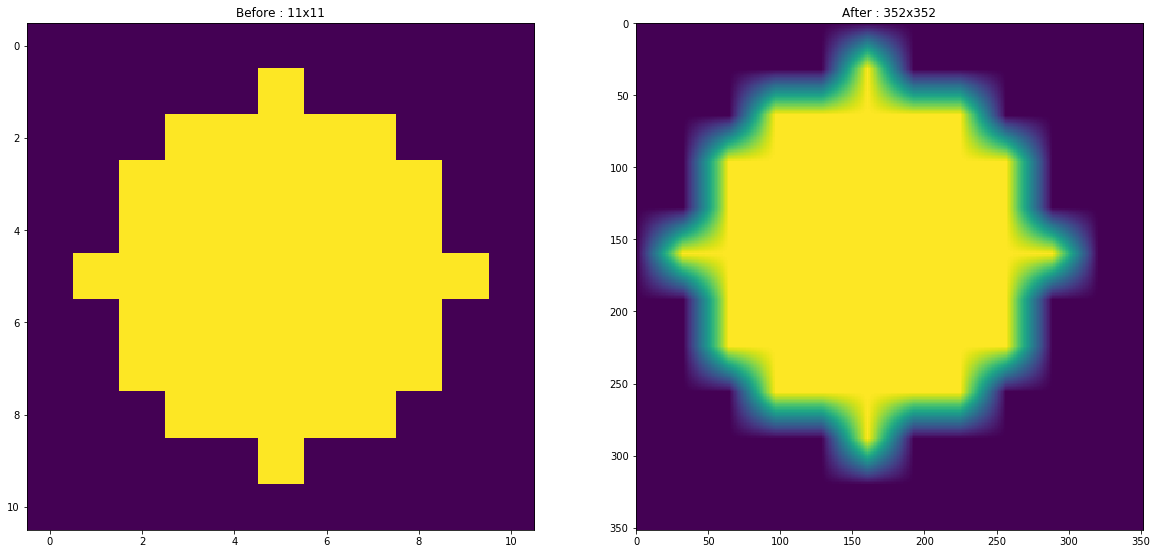

In [4]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.imshow(X)
plt.title('Before : 11x11')

plt.subplot(1,2,2)
plt.imshow(X_upsample)
plt.title('After : 352x352')

### Implement naive bilinear interpolation filter
- https://en.wikipedia.org/wiki/Bilinear_interpolation

In [5]:
F_bi = np.zeros((64,64))
# F = A B
#     C D
# A
for j in range(0,32):
    for i in range(0, 32):
        F_bi[j,i] = (i/32)*(j/32)

# B
for j in range(0,32):
    for i in range(32, 64):
        F_bi[j,i] = ((64-i)/32)*(j/32)
        
# C
for j in range(32,64):
    for i in range(0, 32):
        F_bi[j,i] = (i/32)*((64-j)/32)

# D
for j in range(32,64):
    for i in range(32, 64):
        F_bi[j,i] = ((64-i)/32)*((64-j)/32)

FBI = tf.convert_to_tensor(F_bi)

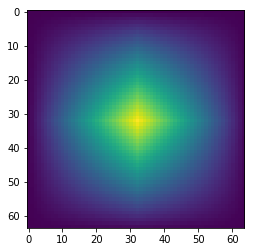

In [6]:
plt.imshow(FBI)

### Apply Filter to X

In [7]:
X = tf.expand_dims(tf.expand_dims(X,2),0)
FBI = tf.expand_dims(tf.expand_dims(FBI,2),3)

In [8]:
print(X.shape)
print(FBI.shape)

(1, 11, 11, 1)
(64, 64, 1, 1)


In [15]:
X_upsample_by_filter = tf.nn.conv2d_transpose(X,FBI,output_shape=[1,32*11,32*11,1],strides=[1,32,32,1])

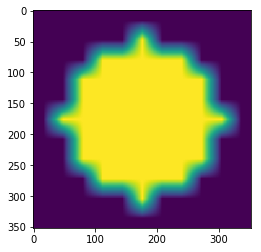

In [17]:
X_upsample_by_filter = tf.squeeze(X_upsample_by_filter)
plt.imshow(X_upsample_by_filter)